---
title: "DFT and FFT"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

## DFT

When studying the frequencies of a time series, we don't actually calculate the Fourier transform, but the Discrete Fourier Transform (DFT).

$$
\begin{split}
\text{continuous Fourier:}&\\
F(k) &= \int_{-\infty}^{\infty}x(t)e^{-2\pi i k t}dt\\
\text{discrete Fourier:}&\\
F_k &= \sum_{n=0}^{N-1} x_n e^{-2\pi i k \frac{n}{N}}
\end{split}
$$

Clearly, in the discrete version, time $t$ becomes the index $n$ and frequency $f$ becomes the index $k$. The Fourier transform yields a complex number for each value of the frequency $\xi_k$.

Let's see this in action. We will calculate the Fourier transform of the function:

$$
x(t) = 3 \sin(2\pi k_1 t) + \tfrac{1}{2} \cos(2\pi k_2 t) + 2
$$

In [1]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()  # datetime converter for a matplotlib
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
import matplotlib.gridspec as gridspec
import math
import scipy

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": "Computer Modern",
# })

# %matplotlib widget

[Text(0.5, 0, 'time (s)')]

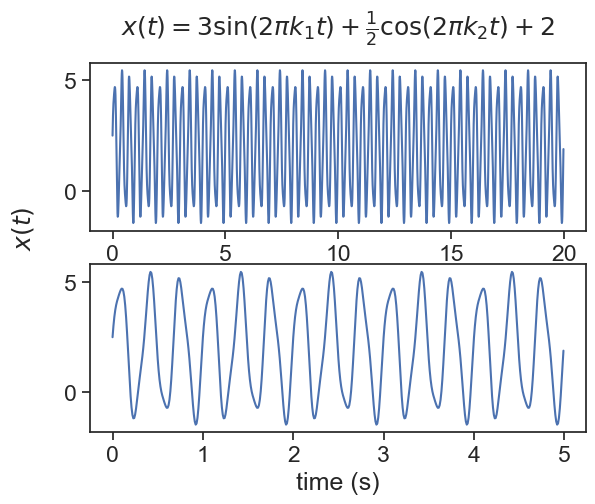

In [2]:
#| code-summary: "define functions for calculating DTW"
fig, ax = plt.subplots(2,1)
k1 = 3.0 # Hz = 1/s
k2 = 7.0 # Hz = 1/s
dt = 0.01
t = np.arange(0,20,dt)
N = len(t)
tau = math.tau
x = 3.0 * np.sin(tau * k1 * t) + 0.5*np.cos(tau * k2 * t) + 2.0
ax[0].plot(t, x)
ax[1].plot(t[:int(5/dt)], x[:int(5/dt)])
fig.text(0,0.5, r"$x(t)$", rotation="vertical")
ax[0].set_title(r"$x(t) = 3 \sin(2\pi k_1 t) + \frac{1}{2} \cos(2\pi k_2 t) + 2$", pad=20)
ax[1].set(xlabel=r"time (s)")

In [3]:
#| code-fold: false
def my_dft(signal, dt):
    N = len(signal)
    k_index = np.arange(N)
    n = np.arange(N)
    F = []
    for ki in k_index:
        expon = np.exp(-2.0*np.pi*1j * ki * n / N)
        Fk = np.sum(signal * expon)
        F.append(Fk)
    k = build_k(N, dt)
    return k, np.array(F)/N

def build_k(N, dt):
    if N%2 == 0:
        k = np.hstack([np.arange(0,N//2),
                       np.arange(-N//2,0)])
    else:
        k = np.hstack([np.arange(0,(N-1)//2+1),
                       np.arange(-(N-1)//2,0)])
    return k / (dt*N)

In [4]:
#| code-fold: false
k_dft, dft = my_dft(x, dt)
dft_abs = np.abs(dft)

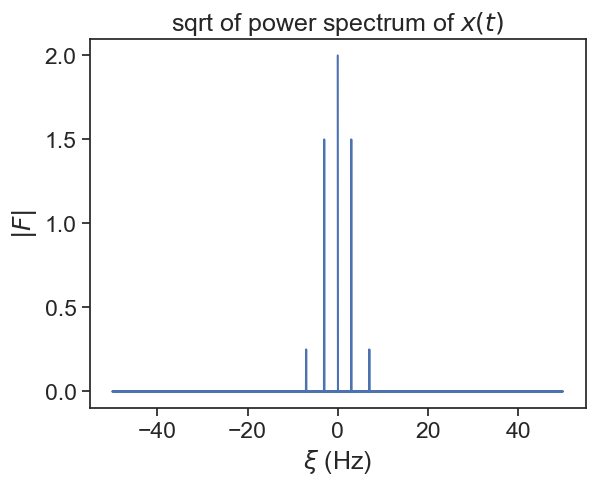

In [5]:
#| code-summary: "plot power spectrum"
fig, ax = plt.subplots()
ax.plot(k_dft, dft_abs)
ax.set(xlabel=r"$\xi$ (Hz)",
       ylabel=r"$|F|$",
       title=r"sqrt of power spectrum of $x(t)$");

Why does this work the way it does?

<iframe width="560" height="315" src="https://www.youtube.com/embed/spUNpyF58BY?si=aaS6qgDLfFeakmwx" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

The power spectrum of any real-valued signal is symmetric between positive and negative frequencies, so let's plot only the positive frequencies:

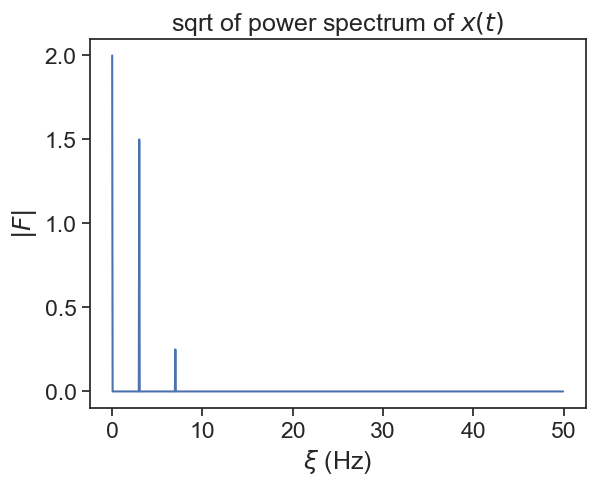

In [6]:
#| code-summary: "plot power spectrum"
halfN = N//2
fig, ax = plt.subplots()
ax.plot(k_dft[:halfN], dft_abs[:halfN])
ax.set(xlabel=r"$\xi$ (Hz)",
       ylabel=r"$|F|$",
       title=r"sqrt of power spectrum of $x(t)$");

## FFT

The Fast Fourier Transform is a very efficient algorithm to calculate the DFT. Derek Muller (Veritasium) made a great video on this topic.

<iframe width="560" height="315" src="https://www.youtube.com/embed/nmgFG7PUHfo?si=C8Cm1p2wMqDWrtxT" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

We can from now on use `scipy`'s implementation of the FFT.

In [7]:
#| code-fold: false

fft = scipy.fft.fft(x) / N
k_fft = scipy.fft.fftfreq(N, dt)
fft_abs = np.abs(fft)

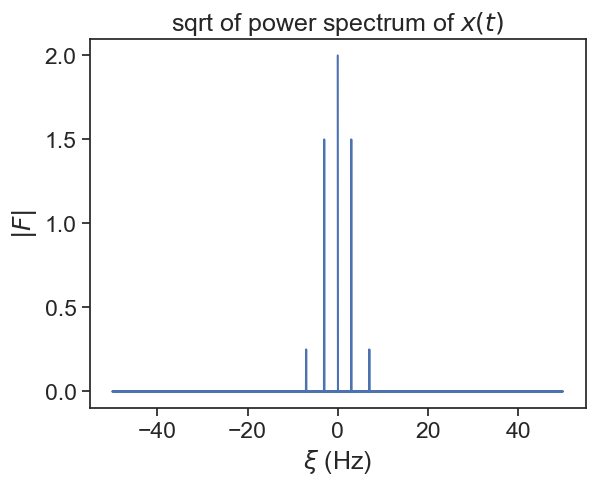

In [8]:
#| code-summary: "plot power spectrum"
fig, ax = plt.subplots()
ax.plot(k_fft, fft_abs)
ax.set(xlabel=r"$\xi$ (Hz)",
       ylabel=r"$|F|$",
       title=r"sqrt of power spectrum of $x(t)$");

We have the exact same result as before :)

Let's zoom in.

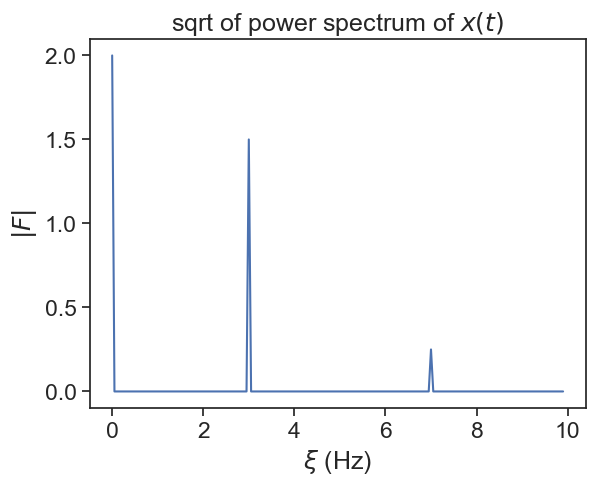

In [9]:
#| code-summary: "plot power spectrum"

dk = 1 / (t.max() - t.min())
n = int(10/dk)

fig, ax = plt.subplots()
ax.plot(k_fft[:n], fft_abs[:n])
ax.set(xlabel=r"$\xi$ (Hz)",
       ylabel=r"$|F|$",
       title=r"sqrt of power spectrum of $x(t)$");